<div style="border: 2px solid #FF69B4; background-color: #000000; color: white; padding: 20px; border-radius: 5px;">

# Figure 2
    
---
Include the zonal mean plots and time series

> 2m-temperature

> sea-ice concentration (Arctic and Antarctic)

---
*2018-2024*

</div>


In [1]:
# import geocat.comp
import os
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from datetime import datetime
from matplotlib.ticker import FormatStrFormatter

In [2]:
rpath = '/work/ab0995/a270229/work/data/paper1/story-nudged/data/full_data/'
plotpath = '/work/ab0995/a270229/work/data/paper1/story-nudged/plot/ppr_REV/'
datapath = '/work/ab0995/a270229/work/data/paper1/story-nudged/data/full_data/procced/'

<div style="border: 2px solid #00ff40; background-color: #000000; color: white; padding: 20px; border-radius: 5px;">

2m-temperature

---

Zonal Mean plot

Main figure
  
</div>

In [3]:
variable = '2t'
freq = 'daily'
res = 'tco1279'
exps = ['cont', 'hist', '2k', 'ERA5']

In [4]:
for i in range(len(exps)):
    globals()[f"ds_{exps[i]}"] = xr.open_dataset(f"{rpath}{exps[i]}/ppr_REV/ZNMN_{variable}_{freq}_20180101-20241231_R-{res}_GLB.nc")

/home/a/a270229/.conda/envs/mypython/lib/python3.10/site-packages/xarray/coding/times.py:995: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/a/a270229/.conda/envs/mypython/lib/python3.10/site-packages/xarray/coding/times.py:995: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [5]:
for i in range(len(exps)-1):
    globals()[f"da_{exps[i]}_series"] = globals()[f"ds_{exps[i]}"]['2t'].isel(height=0, lon=0, time=0).drop_vars(['height', 'lon', 'time']).to_series()-273.15
    
da_era5_series = ds_ERA5['2t'].isel(lon=0, time=0).drop_vars(['lon', 'time']).to_series() - 273.15

In [6]:
# Create a pandas DataFrame from the Series
df = pd.DataFrame({
    'ERA5': da_era5_series,
    'Cont': da_cont_series,
    'Hist': da_hist_series,
    'Tp2K': da_2k_series
})

# Reset the index to make 'lat' a column in the DataFrame
df = df.reset_index()

# Sort the DataFrame by latitude in descending order (North to South)
df = df.sort_values('lat', ascending=False)

# Check if the DataFrame is populated correctly
print("DataFrame:\n", df.head())
print("DataFrame Info:\n", df.info())

# Check for NaN values
print("NaN values in DataFrame:\n", df.isna().sum())

DataFrame:
     lat       ERA5       Cont       Hist       Tp2K
0  90.0 -12.947021 -16.747925 -14.177429 -13.277100
1  89.9 -12.953827 -16.755066 -14.184723 -13.301666
2  89.8 -12.953827 -16.757385 -14.188904 -13.306824
3  89.7 -12.952606 -16.752289 -14.185150 -13.304321
4  89.6 -12.951172 -16.753662 -14.186340 -13.306305
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     1801 non-null   float64
 1   ERA5    1801 non-null   float32
 2   Cont    1801 non-null   float32
 3   Hist    1801 non-null   float32
 4   Tp2K    1801 non-null   float32
dtypes: float32(4), float64(1)
memory usage: 42.3 KB
DataFrame Info:
 None
NaN values in DataFrame:
 lat     0
ERA5    0
Cont    0
Hist    0
Tp2K    0
dtype: int64


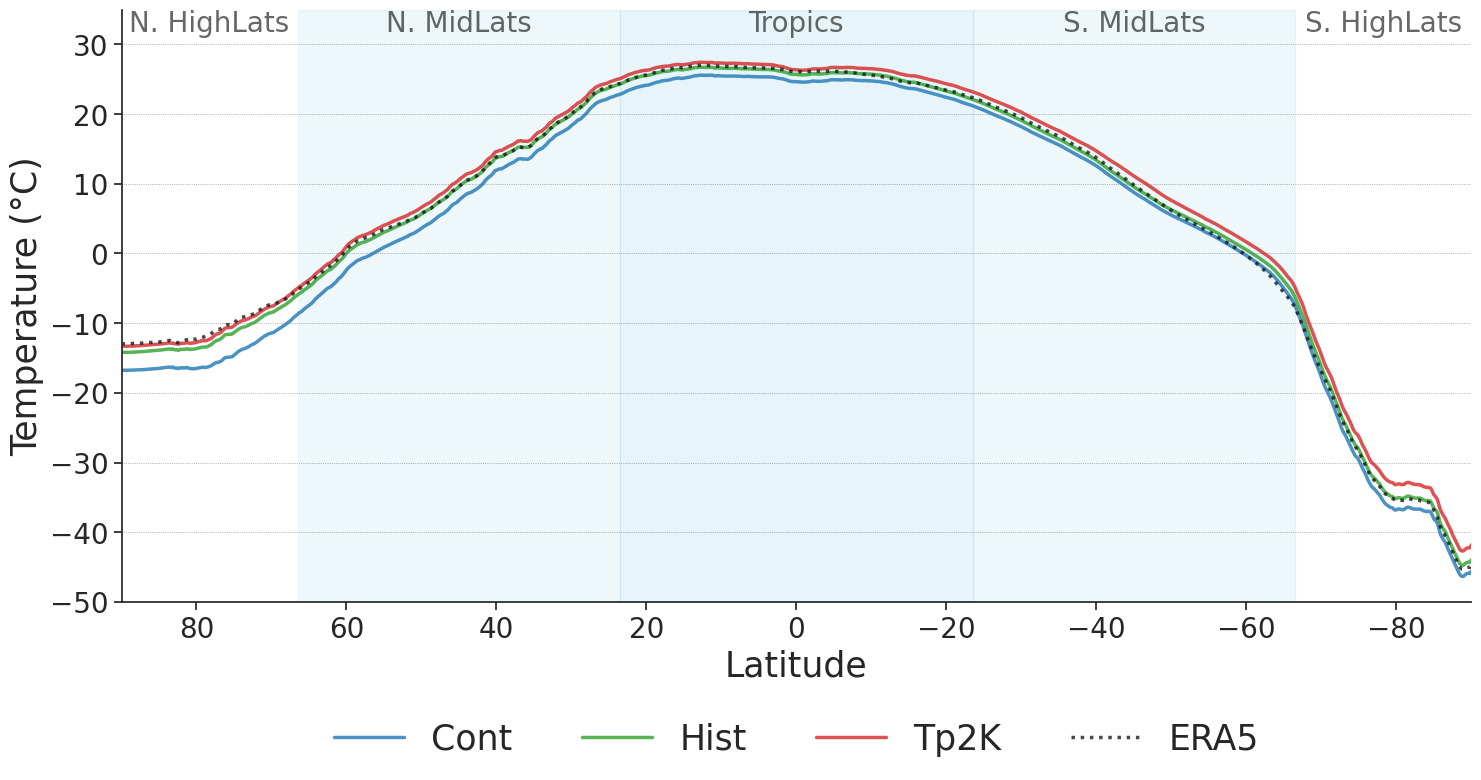

In [7]:
# Set the style for a clean, modern look
sns.set(style="whitegrid")
sns.set_style("ticks")

# Define colors and labels
colors = ['#1f77b4', '#2ca02c', '#d62728']  # Remove 'k' for ERA5 since it will be plotted last
labels = ['Cont', 'Hist', 'Tp2K', 'ERA5']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot Cont, Hist, and Tp2K lines
for label, color in zip(labels[:-1], colors):
    if label in df.columns and not df[label].isnull().all():
        ax.plot(df['lat'], df[label], color=color, label=label, linewidth=2.5, alpha=0.8)

# Plot the ERA5 line last with dotted style
if 'ERA5' in df.columns and not df['ERA5'].isnull().all():
    ax.plot(df['lat'], df['ERA5'], color='k', label='ERA5', linewidth=2.5, linestyle=':', alpha=0.8)

# Set axis limits
ax.set_ylim([-50, 35])
ax.set_xlim([-90, 90])

# Shade climate zones
climate_zones = [
    (-90, -66.5, 'S. HighLats', 'white'),
    (-66.5, -23.5, 'S. MidLats', 'lightblue'),
    (-23.5, 23.5, 'Tropics', 'skyblue'),
    (23.5, 66.5, 'N. MidLats', 'lightblue'),
    (66.5, 90, 'N. HighLats', 'white')
]

for start, end, name, color in climate_zones:
    ax.axvspan(start, end, alpha=0.2, color=color)
    ax.text((start + end) / 2, ax.get_ylim()[1], name, 
            ha='center', va='top', fontsize=20, alpha=0.7)

# Customize the plot
ax.set_facecolor('white')
sns.despine(ax=ax, top=True, right=True)

# Set labels and title
ax.set_xlabel('Latitude', fontsize=25)
ax.set_ylabel('Temperature (°C)', fontsize=25)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=20)

# Add grid lines
ax.grid(True, which='major', axis='y', color='k', linestyle=':', linewidth=0.5, alpha=0.7)

# Reverse the x-axis so latitudes go from North to South
ax.invert_xaxis()

# Add legend
legend = ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, -0.15), 
                   ncol=4, frameon=False)
legend.get_frame().set_linewidth(0.0)

# Adjust layout and save
plt.tight_layout()
# plt.savefig(f"{plotpath}F2.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


<div style="border: 2px solid #00ff40; background-color: #000000; color: white; padding: 20px; border-radius: 5px;">

2m-temperature

---

Time series

Supplemental

</div>

In [8]:
variable = '2t'
freq = 'daily'
res = 'tco1279'
exps = ['cont', 'hist', '2k', 'ERA5']

In [9]:
for i in range(len(exps)):
    globals()[f"ds_{exps[i]}"] = xr.open_dataset(f"{rpath}{exps[i]}/ppr_REV/FLDMN_{variable}_{freq}_20170101-20241231_R-{res}_GLB.nc")

/home/a/a270229/.conda/envs/mypython/lib/python3.10/site-packages/xarray/coding/times.py:995: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/a/a270229/.conda/envs/mypython/lib/python3.10/site-packages/xarray/coding/times.py:995: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [10]:
for i in range(len(exps)):
    globals()[f"da_{exps[i]}"] = globals()[f"ds_{exps[i]}"]['2t']-273.15 #.isel(height=0,lat=0,lon=0).drop_vars('height')-273.15

In [11]:
# print(f"cont_NH: dims={da_cont.dims}, shape={da_cont.shape}")
# print(f"hist_NH: dims={da_hist.dims}, shape={da_hist.shape}")
# print(f"era5_NH: dims={da_ERA5.dims}, shape={da_ERA5.shape}")
# print(f"tp2k_NH: dims={da_2k.dims}, shape={da_2k.shape}")

DataFrame:
                  ERA5       Cont       Hist       Tp2K
time                                                  
2017-01-01  13.068878  12.593567  12.903290        NaN
2017-01-02  13.031097  12.314514  12.752350        NaN
2017-01-03  12.959900  12.151062  12.637604        NaN
2017-01-04  12.878448  12.021637  12.545532  13.574677
2017-01-05  12.729614  11.872223  12.416107  13.524078
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2017-01-01 to 2024-12-31
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ERA5    2922 non-null   float32
 1   Cont    2922 non-null   float32
 2   Hist    2922 non-null   float32
 3   Tp2K    2919 non-null   float32
dtypes: float32(4)
memory usage: 68.5 KB
DataFrame Info:
 None
NaN values in DataFrame:
 ERA5    0
Cont    0
Hist    0
Tp2K    3
dtype: int64


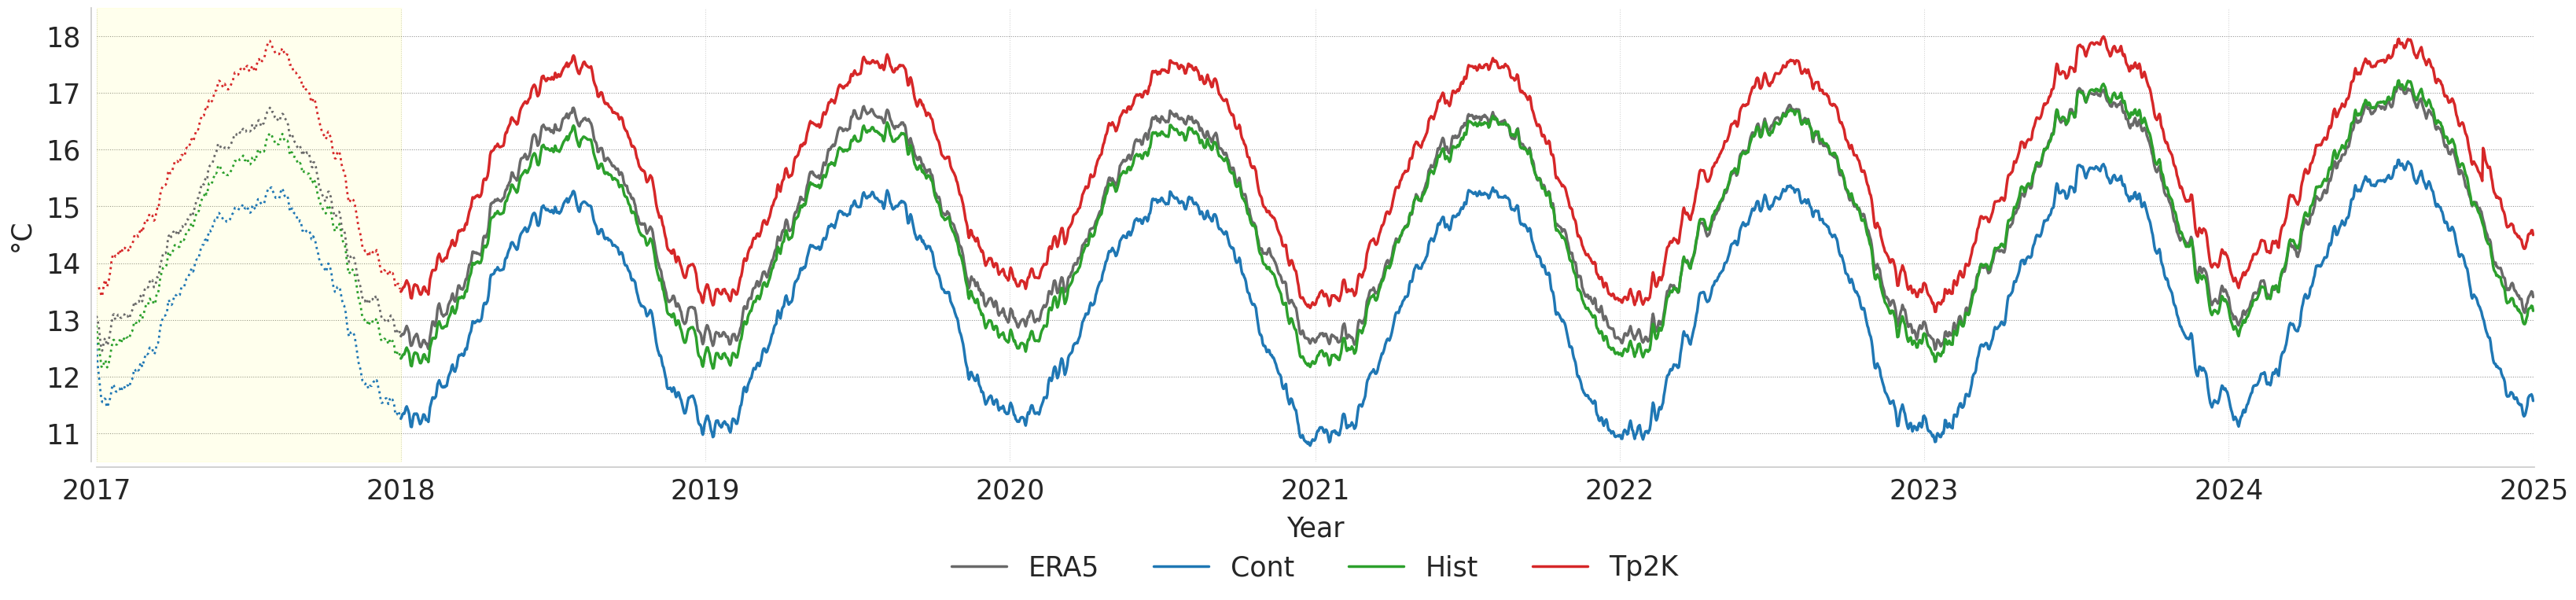

In [12]:
# Select the single latitude and longitude point and convert to pandas Series
cont_series = da_cont.isel(height=0, lat=0, lon=0).drop_vars('height').to_series()
hist_series = da_hist.isel(height=0, lat=0, lon=0).drop_vars('height').to_series()
era5_series = da_ERA5.isel(lat=0, lon=0).to_series()
tp2k_series = da_2k.isel(height=0, lat=0, lon=0).drop_vars('height').to_series()

# Convert the time index to just the date (removing the time part)
era5_series.index = era5_series.index.normalize()
cont_series.index = cont_series.index.normalize()
hist_series.index = hist_series.index.normalize()
tp2k_series.index = tp2k_series.index.normalize()

# Create a pandas DataFrame from the Series
df = pd.DataFrame({
    'ERA5': era5_series,
    'Cont': cont_series,
    'Hist': hist_series,
    'Tp2K': tp2k_series
})

# Filter the DataFrame to only include data between 2019-07-14 00:00 and 2019-07-15 22:00
start_time = pd.Timestamp('2017-01-01 00:00')
end_time = pd.Timestamp('2025-01-01 00:00')
# df = df_o[start_time:end_time]

# Check if the DataFrame is populated correctly
print("DataFrame:\n", df.head())
print("DataFrame Info:\n", df.info())

# Check for NaN values
print("NaN values in DataFrame:\n", df.isna().sum())

# Set the style
sns.set(style="whitegrid")

# Define colors and labels
colors = ['dimgrey', '#1f77b4', '#2ca02c', '#d62728']
# colors = ['k', 'green', 'blue', 'red']

# colors = ['darkgrey', '#4daf4a', '#984ea3', '#ff7f00']
# colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00']
# colors = ['k', '#D95F02', '#7570B3', '#E7298A']  # Green, Orange, Purple, Pink



labels = ['ERA5', 'Cont', 'Hist', 'Tp2K']

# Define the first year end date
first_year_end = pd.Timestamp('2017-12-31 23:59')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(40, 7.5))

# Plot each time series
for label, color in zip(labels, colors):
    if label in df.columns:
        if not df[label].isnull().all():
            # Split data into two parts: first year and remaining years
            df_first_year = df.loc[df.index <= first_year_end, label]
            df_remaining_years = df.loc[df.index > first_year_end, label]

            # Plot first year data with dashed lines (without adding it to the legend)
            ax.plot(df_first_year.index, df_first_year, color=color, linewidth=2.0, linestyle=':', label='_nolegend_')

            # Plot remaining years data with solid lines (this will be included in the legend)
            ax.plot(df_remaining_years.index, df_remaining_years, color=color, label=f'{label}', linewidth=2.5, linestyle='-')
        else:
            print(f"Warning: {label} contains only NaN values.")
    else:
        print(f"Warning: {label} not found in DataFrame columns.")

# Add vertical dashed line after the first year
# ax.axvline(x=first_year_end, color='gray', linestyle='--', linewidth=2.0, alpha=0.75)

# Customize the plot
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

ax.set_xlim([start_time, end_time])
ax.set_ylim([10.5, 18.5])

# Set labels and title
ax.set_xlabel('Year', fontsize=25, labelpad=10)
ax.set_ylabel('°C', fontsize=25, labelpad=10)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=25)

# Add grid lines for the first year with a different color
ax.grid(True, which='both', axis='y', color='gray', linestyle=':', linewidth=1.0, alpha=0.7)
# Highlight first year
ax.fill_betweenx(ax.get_ylim(), start_time, first_year_end, color='yellow', alpha=0.07)

# Add grid lines for the remaining years (default color)
ax.grid(True, which='both', linestyle=':', linewidth=0.75, alpha=0.9)

sns.despine(offset=5)

# Add legend (only for solid lines)
legend = ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, -0.15), 
                   ncol=4, frameon=False)
legend.get_frame().set_linewidth(0.0)

# To save plot
plt.savefig(f"{plotpath}CC_tim_{variable}_{freq}_20170101-20241231_R-{res}.png", dpi=500, bbox_inches='tight')

plt.show()
